# **PART A**

### **section 1A**

What is the effect of the explanatory variables **age** (discrete variable, name in the data - Age), **cholesterol** (continuous variable, name in the data - totChol) and **cigarettes Per Day** (discrete variable, name in the data - cigsPerDay) on the explanatory variable **BMI** (continuous variable, name in the data - BMI)

In [153]:
# section 2A

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import f, chi2
import numpy.linalg as ln
import statsmodels.api as sm

df = pd.read_csv("framingham_heart_disease.csv") 
#y = df["BMI"]
data = df[["age","totChol","cigsPerDay","BMI"]]
 # 200 random samples of x, and save all the other samples that not in thos 200 also 
data_200 = data.sample(n=200, random_state = 55) 
not_x_200 = data.drop(data_200.index)
  


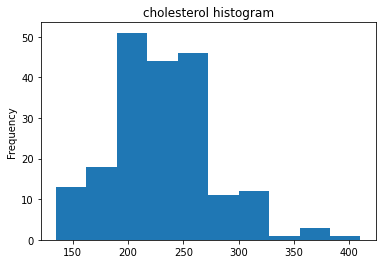

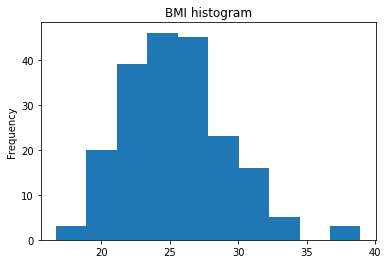

col_0       cigsPerDay
cigsPerDay            
0.0                104
1.0                  4
2.0                  3
3.0                  5
5.0                  4
6.0                  1
9.0                  4
10.0                 9
15.0                10
20.0                35
23.0                 1
25.0                 2
30.0                10
35.0                 1
40.0                 4
43.0                 3



In [154]:
# section 3A a

data_200['totChol'].plot.hist()
plt.title("cholesterol histogram")
plt.show()
data_200['BMI'].plot.hist()
plt.title("BMI histogram")
plt.show()
cigsPerDay_table = pd.crosstab(index=data_200['cigsPerDay'], columns='cigsPerDay')
print(cigsPerDay_table)
print()


In [155]:
#section 3A a continued
age_table = pd.crosstab(index=data_200['age'], columns='age')
print(age_table)

col_0  age
age       
34       1
35       3
36       3
37       9
38       8
39      10
40       9
41      11
42       8
43       7
44       9
45       5
46       5
47       8
48       9
49       2
50       7
51       8
52       7
53       5
54       6
55      10
56       5
57       7
58       5
59       5
60       3
61       4
62       7
63       3
64       4
65       5
68       2


In [156]:
# section 3A b

# missing values
missing_counts = data_200.isnull().sum()
print(missing_counts)


age           0
totChol       0
cigsPerDay    0
BMI           0
dtype: int64


### **section 3A b continued**
There are a no missing values in the data, it seems that the distribution of the variables BMI and cholesterol according to the histogram comes from a normal distribution. It seems that the values of the variable cigsPerDay do not come from any distribution, but there are two main abnormal values 0 and 20 cigarettes per day, which exist 104 and 35 According to the data, all the other values are less than or equal to 10. The values of the variable age also do not seem to come from any distribution and it does not seem that there are any unusual values.

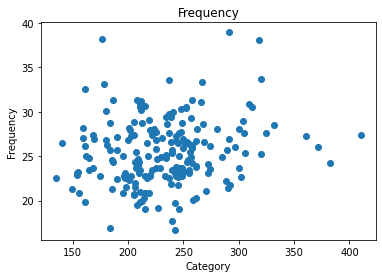

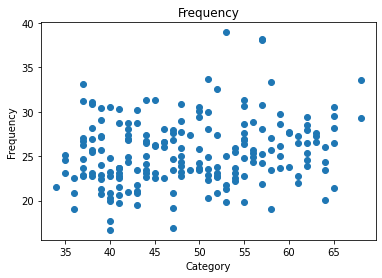

In [157]:
# section 3A c

plt.scatter(data_200['totChol'], data_200['BMI'])
plt.xlabel("Category")
plt.ylabel("Frequency")
plt.title("Frequency")
plt.show()

plt.scatter(data_200['age'], data_200['BMI'])
plt.xlabel("Category")
plt.ylabel("Frequency")
plt.title("Frequency")
plt.show()

### **section 3A c continued**

Of the two variables that explain age and CigsPerDay, it seems that the variable number of cigarettes per day has a positive correlation between it and BMI, but age does not seem to have a visible correlation, therefore it seems that the number of cigarettes per day has the most effect on the BMI index

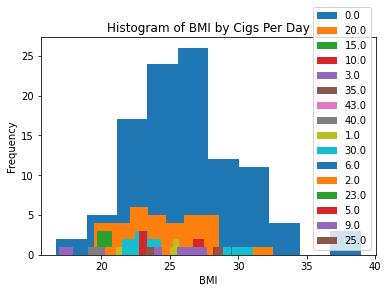

In [158]:
# section 3A d
import matplotlib.pyplot as plt

#Get unique values of cigsPerDay column
cigs_per_day_values = data_200["cigsPerDay"].unique()

#Set up the plot
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.title("Histogram of BMI by Cigs Per Day")

#Loop through each unique value of cigsPerDay and plot a histogram for that group
for value in cigs_per_day_values:
  plt.hist(data_200[data_200["cigsPerDay"] == value]["BMI"], label=value)

plt.legend()
plt.show()

### **section 3A d continued**

We can see in the histogram that the main value for the number of cigarettes smoked per day is 0 cigarettes.The graph of **BMI** in relation to **age** is not helpful because there are no outliers and there are 34 different values, the histogram will not be informative

In [159]:
# section 4A 

y = data_200["BMI"]
x = data_200[["age","totChol","cigsPerDay"]]
for col in x.columns:
    x[col] = x[col].astype(int)
x.insert(0, 'b0', 1)
b_ols = np.dot(np.dot(ln.inv(np.dot(np.transpose(x),x)),np.transpose(x)),y)
print("beta hat [bias, age ,totChol ,cigsPerDay] is:", b_ols)
print()

beta hat [bias, age ,totChol ,cigsPerDay] is: [ 2.04973258e+01  6.90965234e-02  8.53028344e-03 -4.89021042e-02]



<ipython-input-159-a1a1dfa3838b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[col] = x[col].astype(int)


### section 4A continued

The effect of an increase of one unit of each variable on the explained variable is 1*bi when it is negative the predicted value will decrease and when it is positive the predicted value will increase

In [160]:
# section 5A 

e_square = np.dot(np.transpose(y-np.dot(x,b_ols)),y-np.dot(x,b_ols))


y_mean = np.mean(y)
y_mean_vector = np.full(len(y), y_mean)
SSt = np.dot(np.transpose(y-y_mean_vector),y-y_mean_vector)
SSr = SSt - e_square
MSr = SSr/3
MSres = e_square / (len(y)-4)
MSt = SSt/(len(y)-1)
print("SSr :", SSr, "SSres :",e_square,"SSt :",SSt)

print("Reg df :",3 ,"Res df :",len(y)-4 ,"SSt df :", len(y)-1)
print("MSr :", MSr, "MSres :",MSres,"MSt :",MSt)

r_square = SSr/SSt
r_square_adj = 1 - MSres/MSt
F = MSr/MSres
print("F statistic value :", F)

SSr : 218.3297858158594 SSres : 2581.979196184141 SSt : 2800.3089820000005
Reg df : 3 Res df : 196 SSt df : 199
MSr : 72.77659527195313 MSres : 13.173363245837454 MSt : 14.071904432160807
F statistic value : 5.5245265703084


In [161]:
# section 6A 
z = 1.96
res_var_est = e_square/(len(y)-4)
C=ln.inv(np.dot(np.transpose(x),x))

for i in range(len(C)):
  res_se_est = np.sqrt(res_var_est*C[i][i])
  interval = z*res_se_est
  print("Confidence interval of beta",i ,": [", b_ols[i]-interval,",",b_ols[i]+interval,"]")

data = data.dropna()
y_all = data["BMI"]
x_all = data[["age","totChol","cigsPerDay"]]
for col in x_all.columns:
    x_all[col] = x_all[col].astype(int)
x_all.insert(0, 'b0', 1)
b_ols_all = np.dot(np.dot(ln.inv(np.dot(np.transpose(x_all),x_all)),np.transpose(x_all)),y_all)
print("beta hat [bias, age ,totChol ,cigsPerDay] is:", b_ols_all)
print()

Confidence interval of beta 0 : [ 16.99567621498955 , 23.998975390516037 ]
Confidence interval of beta 1 : [ 0.007782928007064767 , 0.13041011874170233 ]
Confidence interval of beta 2 : [ -0.0032408614128299797 , 0.02030142828585169 ]
Confidence interval of beta 3 : [ -0.09284467882624725 , -0.004959529655133112 ]
beta hat [bias, age ,totChol ,cigsPerDay] is: [ 2.17913638e+01  4.64732804e-02  8.11250188e-03 -2.44188206e-02]



<ipython-input-161-18cdda4f2301>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_all[col] = x_all[col].astype(int)


### section 6A continued
Indeed, it can be seen that the beta estimator values on the original sample are contained within the confidence intervals built on beta hat from the data (the 200 records)

In [162]:
# section 7A 
from scipy.stats import f
p = f.cdf(MSr/MSres, 3, len(y)-4)
p_value = 1-p
F_q = f.ppf(0.95, 3, len(y)-4)
print("p value = ", p_value)
print("F alpha value = ", F_q)

p value =  0.0011609363474324175
F alpha value =  2.6506765101121257


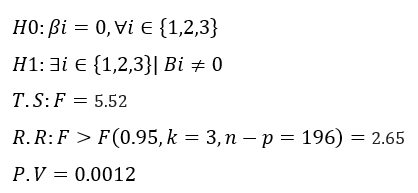

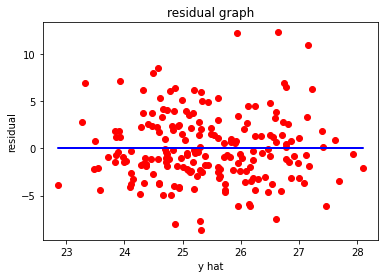

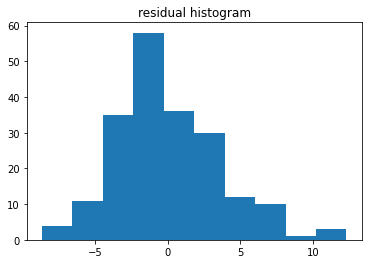

In [163]:
# section 8A 

import matplotlib.pyplot as plt
y_hat = np.dot(x,b_ols)
residual = y - y_hat

plt.scatter(y_hat, residual, color='r')
y_final = y_hat*0
plt.plot(y_hat,y_final, 'b')

    
plt.xlabel("y hat")
plt.ylabel("residual")
plt.title("residual graph")
plt.show()

# Create the histogram
plt.hist(residual)
plt.title("residual histogram")
plt.show()

### section 8A continued
The linearity assumption makes sense because the residuals are around e=0.
The assumption of equality of variances makes sense because the distribution of points around e=0 seems to be uniform.
And from the histogram of the residuals it seems likely that the noise distribution is normal

In [164]:
# section 9A a
not_x_200 = not_x_200.dropna()
not_x200_sample = not_x_200.sample(n = 1000, random_state=8)
y_new = not_x200_sample["BMI"]
x_new = not_x200_sample[["age","totChol","cigsPerDay"]]
x_new.insert(0, 'b0', 1)

beta_hat_np = np.array(pd.DataFrame(b_ols))
y_predict = np.dot(x_new,beta_hat_np)
y_predict = np.squeeze(y_predict)
y_new_indexed = y_new.reset_index(drop = True)
y_new_indexed

0      24.38
1      25.91
2      25.23
3      34.55
4      25.84
       ...  
995    29.17
996    22.49
997    19.77
998    26.36
999    22.12
Name: BMI, Length: 1000, dtype: float64

In [165]:
# section 9A b
y_IC = []

res_var_est = e_square/(len(y)-4)
C=ln.inv(np.dot(np.transpose(x),x))
z=1.96

interval_lens = z*np.sqrt(res_var_est*np.dot(np.dot(x_new,C),np.transpose(x_new))+res_var_est)
interval_lens = interval_lens.diagonal()

lower_bound = y_predict - interval_lens
upper_bound = y_predict + interval_lens

# Create a DataFrame from the lower_bound and upper_bound arrays
y_IC_df = pd.DataFrame({'lower_bound': lower_bound, 'upper_bound': upper_bound,'REAL': y_new_indexed},index=range(1000))

# Add a column to the DataFrame based on the values in y_predict
y_IC_df['is in bounds'] = np.where((y_new_indexed >= y_IC_df['lower_bound']) & (y_new_indexed <= y_IC_df['upper_bound']), 1, 0)
y_IC_df

,lower_bound,upper_bound,REAL,is in bounds
0,18.113314,32.434889,24.38,1
1,19.214798,33.601333,25.91,1
2,17.438371,31.985054,25.23,1
3,17.908496,32.234134,34.55,0
4,19.741294,34.141042,25.84,1
...,...,...,...,...
995,16.931745,31.322580,29.17,1
996,19.717825,34.051922,22.49,1
997,19.718887,34.052568,19.77,1
998,18.718920,33.003534,26.36,1


In [166]:
# section 9A c
sum_in = y_IC_df['is in bounds'].sum()
in_precent = sum_in/len(x_new)
print("The precent of real values y in the CI interval is :",in_precent)

The precent of real values y in the CI interval is : 0.915


### section 9A c continued
We received that the percentage of times the real value was in the interval is 0.915, we received a value lower than 0.95 and this is a relatively large distance. In our opinion, this means that the model fails to capture enough of the explained variance, the shape is good, and therefore the unexplained variance is probably large, which can cause the true value to be outside the interval

In [167]:
# section 10A
 
x1 = data_200["age"].reset_index(drop=True)
x2 = data_200["totChol"].reset_index(drop=True)
x3 = data_200["cigsPerDay"].reset_index(drop=True)
z_1_2 =x1 * x2
z_1_3 = x1 * x3
z_2_3 = x2 * x3

y_new_model = data_200["BMI"].reset_index(drop=True)
x_new_model = pd.DataFrame({"x1":x1,"x2":x2,"x3":x3,"z_1_2":z_1_2, "z_1_3":z_1_3, "z_2_3":z_2_3})


for col in x_new_model.columns:
    x_new_model[col] = x_new_model[col].astype(int)
x_new_model.insert(0, 'b0', 1)
b_ols_new_model = np.dot(np.dot(ln.inv(np.dot(np.transpose(x_new_model),x_new_model)),np.transpose(x_new_model)),y_new_model)

beta_hat_new = pd.DataFrame(b_ols_new_model)
y_new_model = data_200[["BMI"]].to_numpy().reshape([200,])
#print ("beta estimator :", beta_hat_new)
y_new_model_pred = np.dot(x_new_model,beta_hat_new)

# r^2 adj calc
#new model n=200, k=6, p=7
e_square_new = np.dot(np.transpose(y_new_model-np.dot(x_new_model,beta_hat_new)),y_new_model-np.dot(x_new_model,beta_hat_new))


y_mean_new = np.mean(y_new_model)
y_mean_vector_new = np.full(len(y_new_model), y_mean_new)
SSt_new = np.dot(np.transpose(y_new_model-y_mean_vector_new),y_new_model-y_mean_vector_new)
SSr_new = SSt - e_square
MSr_new = SSr/6
MSres_new = e_square / (len(y_new_model)-7)
MSt_new = SSt_new/(len(y_new_model)-1)

r_square_adj_new = 1 - MSres_new/MSt_new

print("r square adj new model= ",r_square_adj_new, "r square adj previous model= ",r_square_adj)

# MSE calc

def calc_mse(y_pred, y_true):
  n = len(y_pred)
  mse = 1/n * np.sum((y_pred - y_true)**2)
  return mse

y_pred_first_model = np.dot(x,b_ols)
y_true_first_model = y
mse_first = calc_mse(y_pred_first_model, y_true_first_model)

y_pred_second_model = y_new_model_pred
y_true_second_model = y_new_model
mse_second = calc_mse(y_pred_second_model, y_true_second_model)

print("MSE new model= ",mse_second, "MSE previous model= ",mse_first)

r square adj new model=  0.049302060380563395 r square adj previous model=  0.06385355945637117
MSE new model=  3029.210859004493 MSE previous model=  12.909895980920705


### section 10A a continued
For model selection we used MSE and R adjust calculations.
For R adjust, a measure that we are interested in maximizing, we got a higher result for the first model, so in terms of this measure, the model without interactions is better.
For MSE, a measure that we strive to minimize, here too we accepted that the first model minimized the measure in a better way and therefore it is better in this measure as well.
In total, from the results of the two indices, we received that the model without interactions, that is, the first model is better.

# **part 2**

**section b1**

What is the effect of the explanatory variables **age** (discrete variable, name in the data - Age), **systolic blood pressure** (continuous variable, name in the data - sysBP) and **Taking blood pressure medication** (binary variable, name in the data - BPMeds) on the explanatory variable **Risk of heart disease in the next 10 years** (binary variable, name in the data - TenYearCHD)

In [168]:
#section b2:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import f, norm, t, chi2
from scipy import stats

df = pd.read_csv("framingham_heart_disease.csv") 
df = df.dropna()
samples_200 = df.sample(200, random_state=2)

Text(0.5, 1.0, 'histogram of sysBP acroos 200 random people')

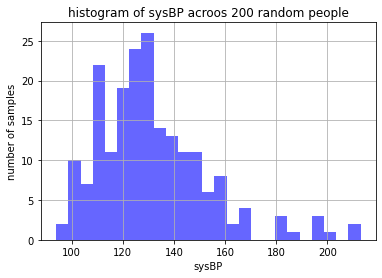

In [169]:
#section b3 a:
sys_bp = samples_200["sysBP"]
sys_bp.hist(bins=25, alpha=0.6, color='b')
plt.ylabel("number of samples")
plt.xlabel("sysBP")
plt.title("histogram of sysBP acroos 200 random people")

In [170]:
#section b3 a:
table = samples_200['BPMeds'].value_counts()
print("BPMeds|count")
table

BPMeds|count


0.0    195
1.0      5
Name: BPMeds, dtype: int64

In [171]:
#section b3 a:
table = samples_200['age'].value_counts().sort_index()
print("age|count")
print(table)

age|count
34     1
35     3
36     1
37     2
38     6
39     7
40    12
41     6
42     4
43     8
44     5
45    13
46    10
47     7
48     8
49     4
50     7
51    11
52     9
53     9
54     6
55    10
56     4
57     5
58     8
59     4
60     7
61     4
62     5
63     5
64     3
65     3
66     2
67     1
Name: age, dtype: int64


**section b3 b**:In the histogram describing the blood pressure distribution, you can see a few extreme values in the right tail. In addition, it can be seen that the distribution of the data resembles a normal distribution, so symmetries can also be inferred. In addition, abnormal values can also be seen in the age table. Furthermore, it can also be seen that the vast majority of people do not take medication

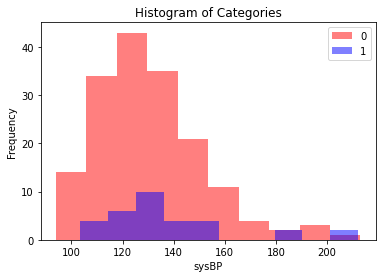

In [172]:
#section b3 c:
import matplotlib.pyplot as plt
categories = samples_200["TenYearCHD"].unique()
plt.hist(samples_200[samples_200["TenYearCHD"] == 0]["sysBP"], color="red", alpha=0.5)
plt.hist(samples_200[samples_200["TenYearCHD"] == 1]["sysBP"], color="blue", alpha=0.5)
plt.xlabel("sysBP")
plt.ylabel("Frequency")
plt.title("Histogram of Categories")
plt.legend([0,1])
plt.show()

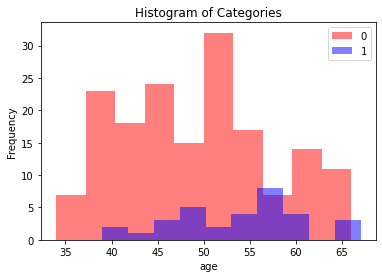

In [173]:
#section b3 c:
import matplotlib.pyplot as plt

categories = samples_200["TenYearCHD"].unique()
plt.hist(samples_200[samples_200["TenYearCHD"] == 0]["age"], color="red", alpha=0.5)
plt.hist(samples_200[samples_200["TenYearCHD"] == 1]["age"], color="blue", alpha=0.5)
plt.xlabel("age")
plt.ylabel("Frequency")
plt.title("Histogram of Categories")
plt.legend([0,1])
plt.show()

In the first graph that links to the variable that explains blood pressure, it seems that there is no very clear connection between high blood pressure and the risk of heart disease since from the sample of 200 it can be seen that there is no dominance for the high values of blood pressure in the context of the risk of heart disease. On the other hand, in the second graph of the link between age and risk of heart disease, you can see a relatively large dominance of the third age groups. It can be seen in the histogram that the highest values from the group of patients with heart disease are concentrated in the more advanced ages.
Therefore, it can be said that the explanatory variable 'age' has the highest influence.

In [174]:
#section b4:
import pandas as pd
import numpy as np
import numpy.linalg as ln
import statsmodels.api as sm

y = samples_200["TenYearCHD"].reset_index(drop=True)
x = samples_200[["sysBP","BPMeds","age"]].reset_index(drop=True)
x.insert(0, 'b0', 1)
reg_0 = sm.Logit(y, x).fit()
beta_hat = reg_0.params
beta_hat = pd.DataFrame(beta_hat)
y = samples_200[["TenYearCHD"]].to_numpy().reshape([200,])
print ("beta estimator :", beta_hat)

Optimization terminated successfully.
         Current function value: 0.411388
         Iterations 6
beta estimator :                0
b0     -6.093043
sysBP   0.004618
BPMeds  1.143305
age     0.073306


In [175]:
#section b5
import numpy.linalg as ln

v_hat = np.zeros(shape=(len(x),len(x)))
for index, xi in x.iterrows():
  e_betax = np.exp(np.dot(np.transpose(beta_hat),np.transpose(xi)))
  pi = e_betax / (1+e_betax)
  v_hat[index][index] = pi*(1-pi)

C = ln.inv(np.dot(np.dot(np.transpose(x),v_hat),x))


z = 1.96
for i in range(len(C)):
  interval = z*np.sqrt(C[i][i])
  print("Confidence interval of beta",i ,": [", np.array(beta_hat)[i][0]-interval,",",np.array(beta_hat)[i][0]+interval,"]")


Confidence interval of beta 0 : [ -9.304274134222403 , -2.8818111422484334 ]
Confidence interval of beta 1 : [ -0.012807213134288705 , 0.022043664799825474 ]
Confidence interval of beta 2 : [ -0.8778607186199072 , 3.164469849703781 ]
Confidence interval of beta 3 : [ 0.0210219822318458 , 0.12559014563267795 ]


In [176]:
#section b6
x1 = samples_200["sysBP"].reset_index(drop=True)
x2 = samples_200["BPMeds"].reset_index(drop=True)
x3 = samples_200["age"].reset_index(drop=True)
z_1_2 =x1 * x2
z_1_3 = x1 * x3
z_2_3 = x2 * x3

y_new = samples_200["TenYearCHD"].reset_index(drop=True)
x_new = pd.DataFrame({"x1":x1,"x2":x2,"x3":x3,"z_1_2":z_1_2, "z_1_3":z_1_3, "z_2_3":z_2_3})
x_new.insert(0, 'b0', 1)
reg_1 = sm.Logit(y_new, x_new).fit()
beta_hat_new = reg_1.params
beta_hat_new = pd.DataFrame(beta_hat_new)
y_new = samples_200[["TenYearCHD"]].to_numpy().reshape([200,])
print ("beta estimator :", beta_hat_new)



Optimization terminated successfully.
         Current function value: 0.410882
         Iterations 7
beta estimator :               0
b0    -7.809293
x1     0.017097
x2     2.092125
x3     0.104920
z_1_2  0.007310
z_1_3 -0.000228
z_2_3 -0.044211


### מבחן יחס נראות: 
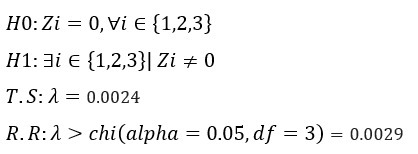

In [177]:
from scipy.stats import chi2
gamma = 2*np.log(reg_0.llf/reg_1.llf)
print(chi2.cdf(0.05,3))
print(gamma>chi2.cdf(0.05,3))

0.002929332764619924
False


#wald :
 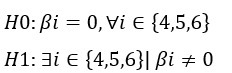

In [178]:
#d
import numpy.linalg as ln

v_hat_new = np.zeros(shape=(len(x_new),len(x_new)))
for index, xi in x_new.iterrows():
  e_betax = np.exp(np.dot(np.transpose(beta_hat_new),np.transpose(xi)))
  pi = e_betax / (1+e_betax)
  v_hat_new[index][index] = pi*(1-pi)

C_new = ln.inv(np.dot(np.dot(np.transpose(x_new),v_hat_new),x_new))

for i in range(len(beta_hat_new[4:])):
  print("are we reject b_",i+4,"!=0 : ", np.abs((np.array(beta_hat_new)[i+4][0]/np.sqrt(C_new[i+4][i+4])))>z)

are we reject b_ 4 !=0 :  False
are we reject b_ 5 !=0 :  False
are we reject b_ 6 !=0 :  False


We performed a visibility ratio test as well as a Wald test on the new parameters in order to understand whether their addition contributes to a certain extent to the model. We discovered that these parameters do not contribute since we do not reject the null hypothesis in which these parameters are zero. Therefore, it can be concluded that the first model without the interactions is better in our case.

In [179]:
#section b6

def mallow_cp(y, y_hat, x, var, p):
  r = np.sum((y - y_hat)**2)
  return r + 2*p*var

def backward_stepwise_regression(x, y):
  selected_features = list(range(x.shape[1]))
  currentmax = 0
  while len(selected_features) > 0:
    # Initialize the list of Cp values
    cp_values = []
    # Iterate over the list of selected features
    for i in range(len(selected_features)):
      # Create a copy of the list of selected features
      temp_selected_features = selected_features.copy()
      # Remove the current feature from the list
      temp_selected_features.pop(i)
      # Fit the model with the current subset of features
      x_new = x.iloc[:, temp_selected_features]
      reg = sm.Logit(y,x_new).fit()
      beta_hat = reg.params
      beta_hat = pd.DataFrame(beta_hat)
      y = samples_200[["TenYearCHD"]].to_numpy().reshape([200,])

      v_hat_new = np.zeros(shape=(len(x_new),len(x_new)))
      for index, xi in x_new.iterrows():
        e_betax = np.exp(np.dot(np.transpose(beta_hat),np.transpose(xi)))
        pi = e_betax / (1+e_betax)
        v_hat_new[index][index] = pi*(1-pi)

      C_new = ln.inv(np.dot(np.dot(np.transpose(x_new),v_hat_new),x_new))
      var = np.dot(x_new,np.dot(C_new,np.transpose(x_new)))[0][0]
      #print ("beta estimator :", beta_hat)
 
      # Calculate the Cp value for the current subset of features
      cp_values.append(mallow_cp(y, np.dot(x_new,np.array(beta_hat)),x_new, var, len(temp_selected_features)))
    # Find the index of the feature with the highest Cp value
    max_cp_index = np.argmax(cp_values)
    # If the highest Cp value is greater than 1, remove the corresponding feature
    if cp_values[max_cp_index] > currentmax:
      selected_features.pop(max_cp_index)
      currentmax = cp_values[max_cp_index]
    else:
      break
  
  # Fit the final model with the selected features
  reg = sm.Logit(y,x.iloc[:,selected_features]).fit()
  beta_hat = reg.params
  beta_hat = pd.DataFrame(beta_hat)
  y = samples_200[["TenYearCHD"]].to_numpy().reshape([200,])
  print ("beta estimator :", beta_hat)
  
  return beta_hat, selected_features,currentmax

y_new = samples_200["TenYearCHD"].reset_index(drop=True)


predictors = list(samples_200.columns)
predictors.remove('TenYearCHD')
x_new ={}
for x in predictors:
  x_new[x] = samples_200[x].reset_index(drop=True)

#for x in predictor_subsets:
#  x1 = samples_200[x[0]].reset_index(drop=True)
#  x2 = samples_200[x[1]].reset_index(drop=True)
#  x_new[x] = x1*x2

x_new = pd.DataFrame(x_new)
print(x_new)
x_new.insert(0, 'b0', 1)
model, selected_features,currentmax = backward_stepwise_regression(x_new,y_new)

print(f"Selected features: {selected_features}")
print("value:", currentmax)

     male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0       0   50        4.0              0         0.0     0.0                0   
1       1   40        3.0              1        40.0     0.0                0   
2       1   40        1.0              0         0.0     0.0                0   
3       1   51        1.0              1        20.0     0.0                0   
4       0   51        3.0              1         4.0     0.0                0   
..    ...  ...        ...            ...         ...     ...              ...   
195     0   45        3.0              0         0.0     0.0                0   
196     1   41        3.0              0         0.0     0.0                0   
197     0   51        3.0              0         0.0     0.0                0   
198     0   63        1.0              0         0.0     0.0                0   
199     1   62        1.0              1        20.0     0.0                0   

     prevalentHyp  diabetes

In [180]:
def forward_stepwise_regression(x, y):
  selected_features = list(range(x.shape[1]))
  final_features = []
  currentmax = 0
  while len(final_features) < len(selected_features):
    # Initialize the list of aic values
    aic_values = []
    # Iterate over the list of selected features
    for i in selected_features:
      # Create a copy of the list of selected features
      temp_selected_features = final_features.copy()
      # Remove the current feature from the list
      temp_selected_features.append(i)
      # Fit the model with the current subset of features
      x_new = x.iloc[:, temp_selected_features]
      reg = sm.Logit(y,x_new).fit()
      beta_hat = reg.params
      beta_hat = pd.DataFrame(beta_hat)
      y = samples_200[["TenYearCHD"]].to_numpy().reshape([200,])

      v_hat_new = np.zeros(shape=(len(x_new),len(x_new)))
      for index, xi in x_new.iterrows():
        e_betax = np.exp(np.dot(np.transpose(beta_hat),np.transpose(xi)))
        pi = e_betax / (1+e_betax)
        v_hat_new[index][index] = pi*(1-pi)

      C_new = ln.inv(np.dot(np.dot(np.transpose(x_new),v_hat_new),x_new))
      var = np.dot(x_new,np.dot(C_new,np.transpose(x_new)))[0][0]
      #print ("beta estimator :", beta_hat)
 
      # Calculate the Cp value for the current subset of features
      aic_values.append((mallow_cp(y, np.dot(x_new,np.array(beta_hat)),x_new, var, len(temp_selected_features)),i))
    # Find the index of the feature with the highest Cp value
    max_cp_index = sorted(aic_values, key=lambda x: x[0],reverse = True)
    # If the highest Cp value is greater than 1, remove the corresponding feature
    if max_cp_index[0][0] > currentmax:
      final_features.append(max_cp_index[0][1])
      selected_features.remove(max_cp_index[0][1])
      currentmax = max_cp_index[0][0]
    else:
      break
  
  # Fit the final model with the selected features
  reg = sm.Logit(y,x.iloc[:,final_features]).fit()
  beta_hat = reg.params
  beta_hat = pd.DataFrame(beta_hat)
  y = samples_200[["TenYearCHD"]].to_numpy().reshape([200,])
  print ("beta estimator :", beta_hat)
  
  return beta_hat, final_features, currentmax

y_new = samples_200["TenYearCHD"].reset_index(drop=True)
predictors = list(samples_200.columns)
predictors.remove('TenYearCHD')
x_new ={}
for x in predictors:
  x_new[x] = samples_200[x].reset_index(drop=True)

x_new = pd.DataFrame(x_new)
x_new.insert(0, 'b0', 1)
model, selected_features,currentmax = forward_stepwise_regression(x_new,y_new)

print(f"Selected features: {selected_features}")
print("value:", currentmax)

Optimization terminated successfully.
         Current function value: 0.439670
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.594441
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.464459
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.433722
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.615149
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.631189
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.692644
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.689681
         Iterations 18
Optimization terminated successfully.
         Current function value: 0.635324
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.693147
 

We used the mallow cp index to measure the models. It can be seen that different results were obtained for each of the methods. It can be seen that the maximum values are relatively close, but the backward model produced a higher value and was therefore chosen in its representation. That is, we will use the columns:
Selected features: [0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15] - [b0,male ,age , education  ,currentSmoker,BPMeds,prevalentStroke,prevalentHyp ,diabetes         ,totChol      ,sysBP         ,diaBP ,BMI           ,heartRate     ,glucose     ]

In [181]:
def backward_stepwise_regression_second(x, y):
  selected_features = list(range(x.shape[1]))
  currentmax = -10000000
  while len(selected_features) > 0:
    aic_values = []
    # Iterate over the list of selected features
    for i in range(len(selected_features)):
      # Create a copy of the list of selected features
      temp_selected_features = selected_features.copy()
      # Remove the current feature from the list
      temp_selected_features.pop(i)
      # Fit the model with the current subset of features
      x_new = x.iloc[:, temp_selected_features]
      reg = sm.Logit(y,x_new).fit()
      beta_hat = reg.params
      beta_hat = pd.DataFrame(beta_hat)
      y = samples_200[["TenYearCHD"]].to_numpy().reshape([200,])

      p = len(temp_selected_features)

      # Calculate logliklihood
      logL = reg.llf
      # Calculate the log-likelihood function value
      aic = logL - p
      # Calculate the aic value for the current subset of features
      aic_values.append(aic)
    # Find the index of the feature with the highest aic value
    max_aic_index = np.argmax(aic_values)
    # If the highest aic value is greater than 1, remove the corresponding feature
    if aic_values[max_aic_index] > currentmax:
      selected_features.pop(max_aic_index)
      currentmax = aic_values[max_aic_index]
    else:
      break
  
  # Fit the final model with the selected features
  reg = sm.Logit(y,x.iloc[:,selected_features]).fit()
  beta_hat = reg.params
  beta_hat = pd.DataFrame(beta_hat)
  y = samples_200[["TenYearCHD"]].to_numpy().reshape([200,])
  print ("beta estimator :", beta_hat)
  
  return beta_hat, selected_features, currentmax

y_new = samples_200["TenYearCHD"].reset_index(drop=True)
predictors = list(samples_200.columns)
predictors.remove('TenYearCHD')
x_new ={}
for x in predictors:
  x_new[x] = samples_200[x].reset_index(drop=True)

x_new = pd.DataFrame(x_new)
x_new.insert(0, 'b0', 1)
model, selected_features,currentmax = backward_stepwise_regression_second(x_new,y_new)

print(f"Selected features: {selected_features}")
print("value:", currentmax)

Optimization terminated successfully.
         Current function value: 0.373368
         Iterations 19
Optimization terminated successfully.
         Current function value: 0.370195
         Iterations 19
Optimization terminated successfully.
         Current function value: 0.387005
         Iterations 19
Optimization terminated successfully.
         Current function value: 0.380586
         Iterations 19
Optimization terminated successfully.
         Current function value: 0.380331
         Iterations 19
Optimization terminated successfully.
         Current function value: 0.370212
         Iterations 19
Optimization terminated successfully.
         Current function value: 0.371897
         Iterations 19
Optimization terminated successfully.
         Current function value: 0.370805
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.370392
         Iterations 19
Optimization terminated successfully.
         Current function value: 0.3

In [182]:
def forward_stepwise_regression_second(x, y):
  selected_features = list(range(x.shape[1]))
  final_features = []
  currentmax = -1000000
  while len(final_features) < len(selected_features):
    # Initialize the list of aic values
    aic_values = []
    # Iterate over the list of selected features
    for i in selected_features:
      # Create a copy of the list of selected features
      temp_selected_features = final_features.copy()
      # Remove the current feature from the list
      temp_selected_features.append(i)
      # Fit the model with the current subset of features
      x_new = x.iloc[:, temp_selected_features]
      reg = sm.Logit(y,x_new).fit()
      beta_hat = reg.params
      beta_hat = pd.DataFrame(beta_hat)
      y = samples_200[["TenYearCHD"]].to_numpy().reshape([200,])

      p = len(final_features)
      # Calculate logliklihood
      logL = reg.llf
      # Calculate the log-likelihood function value
      aic = logL - p
      aic_values.append((aic,i))
    # Find the index of the feature with the highest aic value
    max_cp_index = sorted(aic_values, key=lambda x: x[0],reverse = True)
    # If the highest Cp value is greater than 1, remove the corresponding feature
    if max_cp_index[0][0] > currentmax:
      final_features.append(max_cp_index[0][1])
      selected_features.remove(max_cp_index[0][1])
      currentmax = max_cp_index[0][0]
    else:
      break
  
  # Fit the final model with the selected features
  reg = sm.Logit(y,x.iloc[:,final_features]).fit()
  beta_hat = reg.params
  beta_hat = pd.DataFrame(beta_hat)
  y = samples_200[["TenYearCHD"]].to_numpy().reshape([200,])
  print ("beta estimator :", beta_hat)
  
  return beta_hat, final_features, currentmax

y_new = samples_200["TenYearCHD"].reset_index(drop=True)
predictors = list(samples_200.columns)
predictors.remove('TenYearCHD')
x_new ={}
for x in predictors:
  x_new[x] = samples_200[x].reset_index(drop=True)

x_new = pd.DataFrame(x_new)
x_new.insert(0, 'b0', 1)
model, selected_features, currentmax = forward_stepwise_regression_second(x_new,y_new)

print(f"Selected features: {selected_features}")
print("value:", currentmax)

Optimization terminated successfully.
         Current function value: 0.439670
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.594441
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.464459
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.433722
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.615149
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.631189
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.692644
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.689681
         Iterations 18
Optimization terminated successfully.
         Current function value: 0.635324
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.693147
 

We used the mallow cp index to measure the models. It can be seen that different results were obtained for each of the methods. It can be seen that the maximum values are relatively close, but the backward model produced a higher value and was therefore chosen in its representation. That is, we will use the columns:
Selected features: [0, 2, 3, 4, 9] - [b0, age, education, currentSmoker, diabetes]